In [153]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas_profiling as pp

import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df=pd.read_csv("cus_seg_final.csv")
df.head()

,Customer_ID,age,Graduated,marital,Profession,defaulter,loan,CustGender,state,Transaction mount,...,Credit amount,Duration,Purpose,Atm Used PM,Credit Card PM,credit card repayment in days,Credit_Limit,Work_Experience,Spending_Score,Family_Size
0,PN102321,56,No,married,Healthcare,no,no,F,Washington,44,...,1169,6,Home Appliances,0,2,14,3760,2.0,Low,5
1,PN102322,57,Yes,married,Engineer,unknown,no,M,Washington,84,...,5951,48,Home Appliances,5,2,93,6931,NaN,Average,5
2,PN102323,37,Yes,married,Engineer,no,no,F,Washington,74,...,2096,12,education,0,3,16,19457,6.0,Low,4
3,PN102324,40,Yes,married,Lawyer,no,no,F,Illinois,106,...,7882,42,Home loan,3,3,76,24003,11.0,High,2
4,PN102325,56,Yes,married,Entertainment,no,yes,F,Washington,117,...,4870,24,car,3,3,56,30667,NaN,High,2


In [155]:
df["state"].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia'], dtype=object)

In [156]:
cus = df.copy()

<AxesSubplot:>

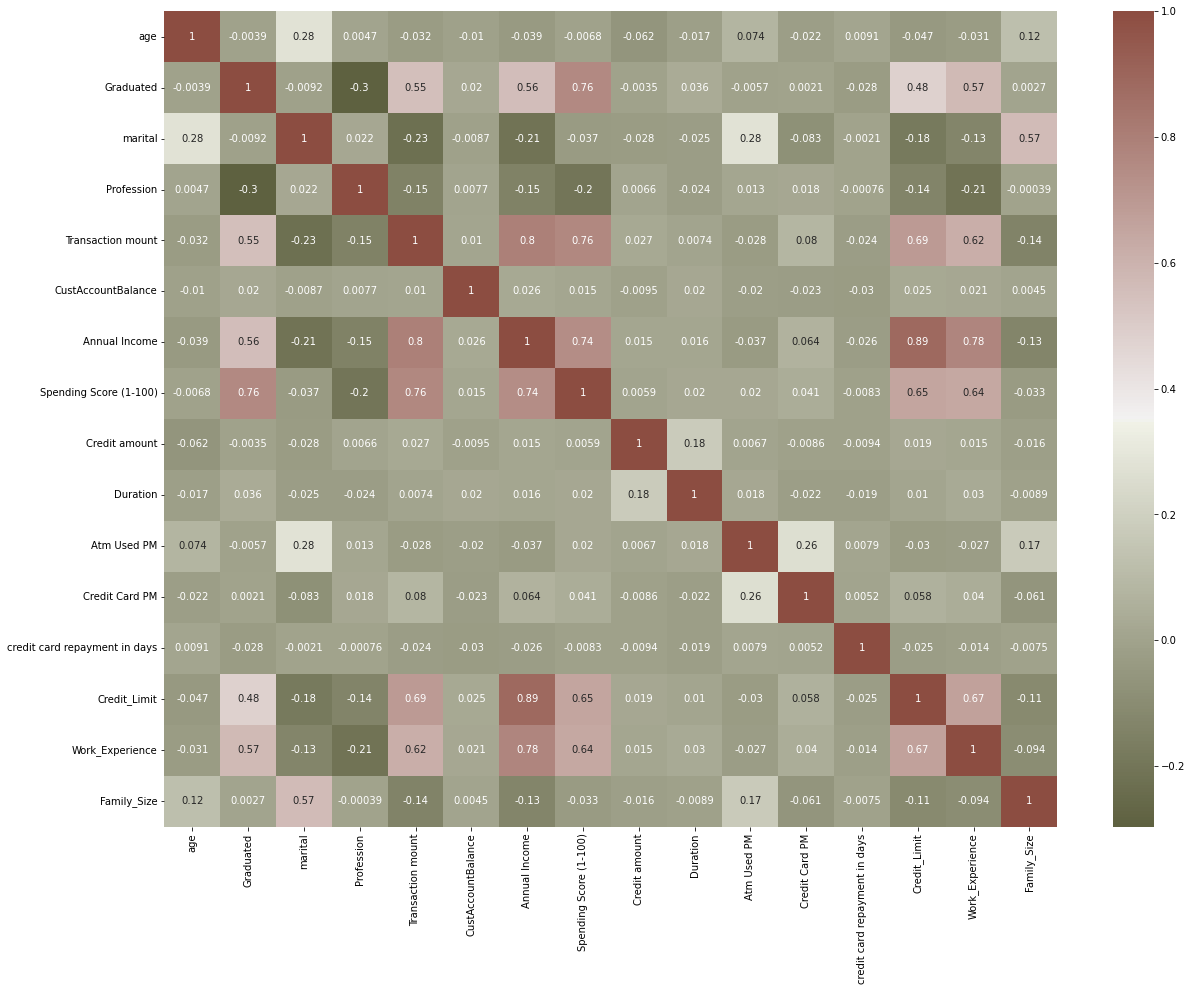

In [260]:
cmap = sns.diverging_palette(90,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

#### 1. Transaction amount is highly correlated with Annual Income
#### 2. Spending Score (1-100) is highly overall correlated with Transaction mount
#### 3. Atm Used PM is highly overall correlated with CustGender
#### 4. Credit Card PM is highly overall correlated with Saving accounts
#### 5. Credit_Limit is highly overall correlated with Transaction mount
#### 6. Work_Experience is highly overall correlated with Transaction mount

In [159]:
df.info()

#checking for null values and Data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    4999 non-null   object 
 1   age                            4999 non-null   int64  
 2   Graduated                      4953 non-null   object 
 3   marital                        4999 non-null   object 
 4   Profession                     4925 non-null   object 
 5   defaulter                      4999 non-null   object 
 6   loan                           4999 non-null   object 
 7   CustGender                     4997 non-null   object 
 8   state                          4999 non-null   object 
 9   Transaction mount              4999 non-null   int64  
 10  CustAccountBalance             4991 non-null   float64
 11  Annual Income                  4999 non-null   int64  
 12  Spending Score (1-100)         4953 non-null   f

In [160]:
df.isna().sum()
# there are some null values in our data

Customer_ID                         0
age                                 0
Graduated                          46
marital                             0
Profession                         74
defaulter                           0
loan                                0
CustGender                          2
state                               0
Transaction mount                   0
CustAccountBalance                  8
Annual Income                       0
Spending Score (1-100)             46
Housing                             0
Saving accounts                   906
Checking account                 1957
Credit amount                       0
Duration                            0
Purpose                             0
Atm Used PM                         0
Credit Card PM                      0
credit card repayment in days       0
Credit_Limit                        0
Work_Experience                   501
Spending_Score                      0
Family_Size                         0
dtype: int64

### Age

In [161]:
df["age"].isna().sum()
# no missing values in age column 

0

In [162]:
df["age"].dtype
# already in integer no need to convert

dtype('int64')

### Graduated

In [163]:
df["Graduated"].isna().sum()

46

In [164]:
df["Graduated"].value_counts()

Yes    3052
No     1901
Name: Graduated, dtype: int64

In [165]:
#lets convert data type to integer

df["Graduated"].replace({"Yes":1, "No":0}, inplace=True)

In [166]:
df["Graduated"].value_counts()

1.0    3052
0.0    1901
Name: Graduated, dtype: int64

In [167]:
# now we will handle missing values in this feature

df['Graduated'].fillna(df['Graduated'].mean(),inplace=True)

In [168]:
df['Graduated'] = df['Graduated'].astype(int)

#### As it was a categorical feature we assume that there are no outliers 

### Marital

In [169]:
df["marital"].value_counts()

married     3394
single      1023
divorced     572
unknown       10
Name: marital, dtype: int64

####  as this feature is categorical and its data type is object we will replace values with 0,1 and 2 |
#### lets consider  single = 0 married = 2 and divorced = 1 

In [170]:
df["marital"].replace({"married":2, "single": 0, "divorced":1, "unknown":3},inplace = True)


In [171]:
df.drop(df[df.marital == 3].index, inplace=True)
# as we dont know the value of the unknown feature we will drop that column

In [172]:
df.marital.value_counts()

2    3394
0    1023
1     572
Name: marital, dtype: int64

In [173]:
df["marital"].dtype

dtype('int64')

### Profession

In [174]:
df.Profession.value_counts()

Artist           1518
Healthcare        830
Entertainment     603
Engineer          433
Doctor            425
Lawyer            402
Executive         375
Marketing         178
Homemaker         151
Name: Profession, dtype: int64

In [175]:
cus.Profession.value_counts()

Artist           1524
Healthcare        830
Entertainment     604
Engineer          433
Doctor            426
Lawyer            402
Executive         375
Marketing         179
Homemaker         152
Name: Profession, dtype: int64

In [176]:
label_encoder = LabelEncoder()
df['Profession']= label_encoder.fit_transform(df['Profession'])

In [177]:
df.Profession.isna().sum()
#there are no null values 

0

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4989 entries, 0 to 4998
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    4989 non-null   object 
 1   age                            4989 non-null   int64  
 2   Graduated                      4989 non-null   int32  
 3   marital                        4989 non-null   int64  
 4   Profession                     4989 non-null   int32  
 5   defaulter                      4989 non-null   object 
 6   loan                           4989 non-null   object 
 7   CustGender                     4987 non-null   object 
 8   state                          4989 non-null   object 
 9   Transaction mount              4989 non-null   int64  
 10  CustAccountBalance             4981 non-null   float64
 11  Annual Income                  4989 non-null   int64  
 12  Spending Score (1-100)         4943 non-null   f

In [179]:
s = (df.dtypes == "object")
object_col = list(s[s].index)
print("Categorical columns are: ", object_col)

Categorical columns are:  ['Customer_ID', 'defaulter', 'loan', 'CustGender', 'state', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Spending_Score']


In [180]:
label_data = df.copy()
label_encoder = LabelEncoder()
for col in object_col:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

#converting all the categorical columns in numeric in on go

,Customer_ID,age,Graduated,marital,Profession,defaulter,loan,CustGender,state,Transaction mount,...,Credit amount,Duration,Purpose,Atm Used PM,Credit Card PM,credit card repayment in days,Credit_Limit,Work_Experience,Spending_Score,Family_Size
0,0,56,0,2,5,0,0,0,50,44,...,1169,6,0,0,2,14,3760,2.0,2,5
1,1,57,1,2,2,1,0,1,50,84,...,5951,48,0,5,2,93,6931,NaN,0,5
2,2,37,1,2,2,0,0,0,50,74,...,2096,12,5,0,3,16,19457,6.0,2,4
3,3,40,1,2,7,0,0,0,14,106,...,7882,42,1,3,3,76,24003,11.0,1,2
4,4,56,1,2,3,0,2,0,50,117,...,4870,24,3,3,3,56,30667,NaN,1,2


In [181]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4989 entries, 0 to 4998
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    4989 non-null   int32  
 1   age                            4989 non-null   int64  
 2   Graduated                      4989 non-null   int32  
 3   marital                        4989 non-null   int64  
 4   Profession                     4989 non-null   int32  
 5   defaulter                      4989 non-null   int32  
 6   loan                           4989 non-null   int32  
 7   CustGender                     4989 non-null   int32  
 8   state                          4989 non-null   int32  
 9   Transaction mount              4989 non-null   int64  
 10  CustAccountBalance             4981 non-null   float64
 11  Annual Income                  4989 non-null   int64  
 12  Spending Score (1-100)         4943 non-null   f

In [182]:
df1 = label_data

### defaulter

In [183]:
df1.defaulter.isna().sum()

0

In [184]:
df.defaulter.value_counts()

no         3377
unknown    1612
Name: defaulter, dtype: int64

In [185]:
df1.defaulter.value_counts()

0    3377
1    1612
Name: defaulter, dtype: int64

In [186]:
# dropeed unknown row in defaulter as it has no use in our data set
df1.drop(df1[df1.defaulter == 1].index, inplace=True)

### Loan

In [187]:
df1.loan.isna().sum()

0

In [188]:
df1.loan.value_counts()

0    2790
2     485
1     102
Name: loan, dtype: int64

In [189]:
df.loan.value_counts()

no         4114
yes         708
unknown     167
Name: loan, dtype: int64

In [190]:
# dropeed unknown row in loan as it has no use in our data set
df1.drop(df1[df1.loan == 1].index, inplace=True)

In [191]:
df1.loan.value_counts()

0    2790
2     485
Name: loan, dtype: int64

In [192]:
df1.shape

(3275, 26)

In [193]:
df.shape

(4989, 26)

### CustomerGender

In [194]:
df1.CustGender.isna().sum()

0

In [195]:
df.CustGender.value_counts()

M    3639
F    1348
Name: CustGender, dtype: int64

In [196]:
df1.CustGender.value_counts()

1    2392
0     882
2       1
Name: CustGender, dtype: int64

In [197]:
df1.drop(df1[df1.CustGender == 2].index, inplace=True)

### state

In [198]:
df1.state.isna().sum()

0

In [199]:
df1.state.nunique()

54

In [200]:
df.state.nunique()

54

### Transaction amount

In [201]:
df1["Transaction mount"].isna().sum()

0

In [202]:
df1["Transaction mount"].shape

(3274,)

In [203]:
df1["Transaction mount"].shape

(3274,)

### CustAccountBalance  

In [204]:
df1.CustAccountBalance.nunique()

3067

In [288]:
df1.CustAccountBalance.isna().sum() 

0

In [287]:
df1.dropna(subset =['CustAccountBalance'],inplace=True)


### Annual Income

In [207]:
df1["Annual Income"].unique()

array([ 51,  84, 125, 131, 106, 105, 124,  62,  76,  70,  67, 120,  82,
       103, 100,  98,  65,  94,  77,  64, 113,  68,  97,  88, 109,  61,
        87,  80, 101,  95, 130,  92, 114, 135,  54, 117,  78,  75,  86,
        96, 110,  66, 116, 112, 107,  50, 102,  81, 115,  63,  91, 128,
        85,  90,  93,  89, 121,  73, 127,  71,  60,  99, 119,  72,  56,
       123, 108, 129, 134, 138,  58, 141,  74, 104, 140,  53,  69,  83,
       118,  79, 111, 136, 133,  59, 122,  55,  57,  52, 139, 144, 132,
       146, 126, 137, 145, 147, 143, 142, 150, 149, 148], dtype=int64)

In [208]:
df1["Annual Income"].isna().sum()

0

### Spending Score

In [209]:
df1["Spending Score (1-100)"].isna().sum()

27

In [210]:
df1["Spending Score (1-100)"].unique()

array([ 31.,  70.,  77.,  80.,  64.,  87.,  22.,  28.,   9.,  23.,  37.,
        74.,  52.,  62.,  50.,  49.,  32.,  69.,  47.,  68.,  24.,  45.,
        65.,  73.,  61.,  63.,  67.,  53.,  27.,  58.,  60.,  72.,  85.,
        51.,  40.,  56.,  20.,  54.,  26.,  59.,  35.,  44.,  21.,  83.,
        25.,  39.,  43.,  66.,  71.,   2.,  92.,  75.,  55.,  11.,  79.,
        78.,  18.,  41.,  57.,  82.,  nan,  48.,   6.,  84.,  46.,  12.,
        76.,  17.,   1.,  89.,  42.,  14.,  13.,  34.,  99.,  16.,  88.,
        30.,  19.,  90.,   8.,  36.,  29.,  96.,  86.,   4.,  38.,  33.,
        15.,  81.,  93.,   5.,  94.,  98.,   3.,  91.,  10.,  97.,   7.,
       100.,  95.])

In [290]:
df1["Spending Score (1-100)"].fillna(df1["Spending Score (1-100)"].mean(),inplace=True)

In [291]:
df1["Spending Score (1-100)"].isna().sum()

0

### Housing

In [213]:
df1["Housing"].isna().sum()

0

In [214]:
df1["Housing"].value_counts()

1    2373
2     493
0     408
Name: Housing, dtype: int64

In [215]:
df["Housing"].value_counts()

own     3655
rent     739
free     595
Name: Housing, dtype: int64

###  ****Saving Accounts

In [216]:
df1["Saving accounts"].isna().sum()

0

In [217]:
df1["Saving accounts"].value_counts()

0    1978
4     601
1     339
2     198
3     158
Name: Saving accounts, dtype: int64

In [218]:
df["Saving accounts"].value_counts()

little        3011
moderate       521
quite rich     312
rich           240
Name: Saving accounts, dtype: int64

### Checking Account

In [219]:
df1["Checking account"].isna().sum()

0

In [220]:
df1["Checking account"].value_counts()

3    1254
1     912
0     890
2     218
Name: Checking account, dtype: int64

In [221]:
df["Checking account"].value_counts()

little      1363
moderate    1359
rich         317
Name: Checking account, dtype: int64

In [222]:
df1["Checking account"].fillna(df1["Checking account"].mean(),inplace = True)

### Credit Amount

In [223]:
df1["Credit amount"].isna().sum()

0

In [224]:
df1["Credit amount"].value_counts()

2384     4
10073    4
1262     4
15576    4
6527     4
        ..
7763     1
9336     1
14258    1
3428     1
1236     1
Name: Credit amount, Length: 2888, dtype: int64

### Duration

In [225]:
df1["Duration"].isna().sum()

0

In [226]:
df1["Duration"].unique()

array([ 6, 12, 42, 24, 30, 48, 15,  9, 10, 18, 36, 11, 27,  7, 54, 20, 33,
       60, 21, 14, 47,  8, 13, 22, 39, 28,  5,  4, 72, 16, 45, 26, 56, 35,
       52, 50, 19, 29, 53,  3, 40, 32, 37, 55, 17, 58, 44, 23,  2, 57, 51,
       46, 41, 34, 49, 43, 25, 38, 31, 59], dtype=int64)

### Purpose

In [227]:
df1["Purpose"].isna().sum()

0

In [228]:
df1["Purpose"].value_counts()

3    1089
0     916
1     602
2     309
5     199
6      82
4      40
7      37
Name: Purpose, dtype: int64

In [229]:
df["Purpose"].value_counts()

car                    1657
Home Appliances        1399
Home loan               916
business                484
education               300
repairs                 111
vacation/others          62
domestic appliances      60
Name: Purpose, dtype: int64

###  ATM used per month

In [230]:
df1["Atm Used PM"].isna().sum()

0

In [231]:
df1["Atm Used PM"].nunique()

11

In [232]:
df1["Atm Used PM"].unique()

array([ 0,  3,  5,  6,  4,  2,  7,  8,  9,  1, 10], dtype=int64)

### Credit card used per month

In [233]:
df1["Credit Card PM"].isna().sum()

0

In [234]:
df1["Credit Card PM"].nunique()

14

In [235]:
df1["Credit Card PM"].value_counts()

3     688
2     673
0     662
1     650
7     141
6     118
5     106
4      85
8      77
10     27
9      24
13     13
12      5
11      5
Name: Credit Card PM, dtype: int64

### credit card repayment in days

In [236]:
df1["credit card repayment in days"].isna().sum()

0

In [237]:
df1["credit card repayment in days"].nunique()

101

### Credit limit

In [238]:
df1["Credit_Limit"].isna().sum()

0

In [239]:
df1["Credit_Limit"].nunique()

3032

### Work_Experience

In [240]:
df1["Work_Experience"].isna().sum()

318

In [241]:
df1["Work_Experience"] = df1["Work_Experience"].dropna(axis = 0, how=any)

In [242]:
df1["Work_Experience"].isna().sum()

318

### Spending Score

In [243]:
df1["Spending_Score"].isna().sum()

0

In [244]:
df1["Spending_Score"].value_counts()

2    1998
0     805
1     471
Name: Spending_Score, dtype: int64

In [245]:
df["Spending_Score"].value_counts()

Low        3042
Average    1210
High        737
Name: Spending_Score, dtype: int64

### Family size

In [246]:
df1["Family_Size"].isna().sum()

0

In [247]:
df1["Family_Size"].value_counts()

2    811
3    778
6    440
5    422
4    421
1    402
Name: Family_Size, dtype: int64

In [248]:
df["Family_Size"].value_counts()

2    1229
3    1171
4     696
6     680
5     671
1     542
Name: Family_Size, dtype: int64

In [249]:
# profile = pp.ProfileReport(df1)
# profile.to_file("output.html")

In [250]:
# profile = pp.ProfileReport(df)
# profile.to_file("output11.html")

<AxesSubplot:>

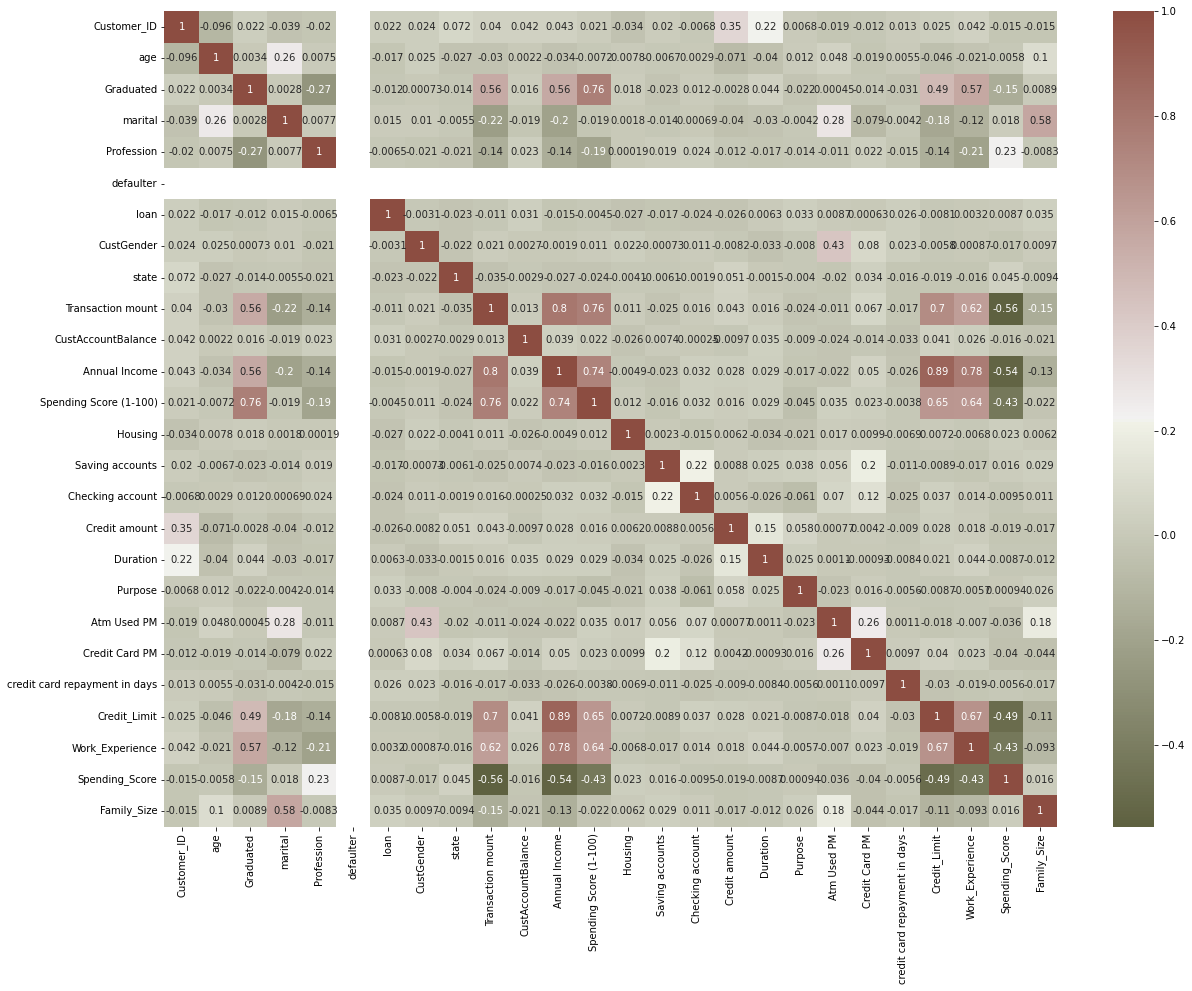

In [259]:
cmap = sns.diverging_palette(90,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df1.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat,cmap=cmap,annot=True, )